---

# Linear Regression Model

## Introduction

Linear regression is a linear model, e.g. a model that assumes a linear relationship between the input variables (x) and the single output variable (y). More specifically, that y can be calculated from a linear combination of the input variables x. It is both a statistical algorithm and a machine learning algorithm.

<img src="linear-regression-in-machine-learning.png" width="500" align="center"/>

## Algorithm

In this project, we will implement linear regresssion based on the single neuron model and grandient descent.

Simple neuron linear model:

<img src="neuron-regression.png" width="500" align="center"/>

Cost function:  $$C(\pmb w,b)=\frac{1}{2N} \sum_{i=1}^N (\hat y^{(i)} - y^{(i)})^2 $$ 

To minimize the cost function, we use stochastic gradient descent:

1. For each epoch do.

2. For i = 1, ..., N do.

3. Calculate $\frac{\partial C(w_1, b; \mathbf{x}^{(i)}, y^{(i)})}{\partial w_1}$ and $\frac{\partial C(\partial C(w_1, b; \mathbf{x}^{(i)}, y^{(i)}))}{\partial b}$.

4. $w \leftarrow w - \alpha \frac{\partial C(w_1, b; \mathbf{x}^{(i)}, y^{(i)})}{\partial w_1}$

5. $b \leftarrow b - \alpha \frac{\partial C(w_1, b; \mathbf{x}^{(i)}, y^{(i)})}{\partial b}$

---

## Implement


In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

sns.set_theme()

Let's see the raw data plot of abnormal class.

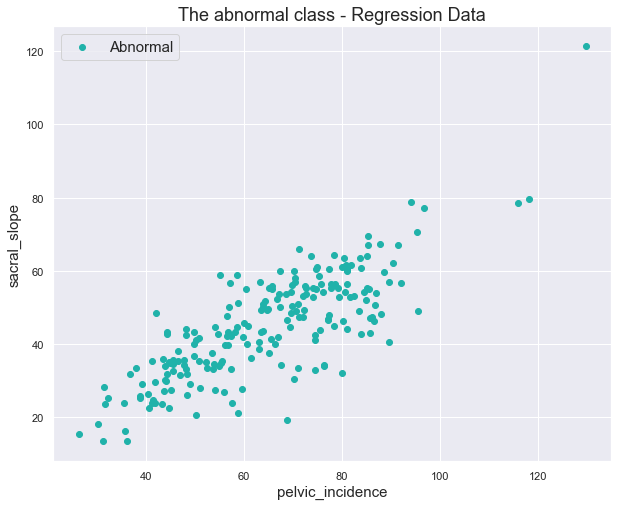

In [3]:
df = pd.read_csv("column_2C_weka.csv")
df = df[df['class'] =='Abnormal']
df = df[["pelvic_incidence", "sacral_slope"]]
X = df.pelvic_incidence.values
X = X.reshape(-1, 1)
y = df.sacral_slope.values

plt.figure(figsize = (10, 8))
plt.scatter(X, y, color = "lightseagreen", label = "Abnormal")
plt.xlabel("pelvic_incidence", fontsize = 15)
plt.ylabel("sacral_slope", fontsize = 15)
plt.legend(fontsize = 15)
plt.title("The abnormal class - Regression Data", fontsize = 18)
plt.show()

It looks like there is a linear relation between the data.

First, we need to define single-neuron function.

In [4]:
class SingleNeuron(object):
    """
    A class used to represent a single artificial neuron. 

    ...

    Attributes
    ----------
    activation_function : function
        The activation function applied to the preactivation linear combination.

    w_ : numpy.ndarray
        The weights and bias of the single neuron. The last entry being the bias. 
        This attribute is created when the train method is called.

    errors_: list
        A list containing the mean sqaured error computed after each iteration 
        of stochastic gradient descent per epoch. 

    Methods
    -------
    train(self, X, y, alpha = 0.005, epochs = 50)
        Iterates the stochastic gradient descent algorithm through each sample 
        a total of epochs number of times with learning rate alpha. The data 
        used consists of feature vectors X and associated labels y. 

    predict(self, X)
        Uses the weights and bias, the feature vectors in X, and the 
        activation_function to make a y_hat prediction on each feature vector. 
    """
    def __init__(self, activation_function):
        self.activation_function = activation_function

    def train(self, X, y, alpha = 0.005, epochs = 50):
        self.w_ = np.random.rand(1 + X.shape[1])
        self.errors_ = []
        N = X.shape[0]

        for _ in range(epochs):
            errors = 0
            for xi, target in zip(X, y):
                self.w_[:-1] -= alpha*(self.predict(xi) - target)*xi
                self.w_[-1] -= alpha*(self.predict(xi) - target)
                errors += .5*((self.predict(xi) - target)**2)
            self.errors_.append(errors/N)
        return self

    def predict(self, X):
        preactivation = np.dot(X, self.w_[:-1]) + self.w_[-1]
        return self.activation_function(preactivation)

Based on the single neuron liner regression model, we still need an activaction function. After that, we give the keyword arguments $\alpha=0.0001$ and epochs = 10 into train() method in SingleNeuron function.

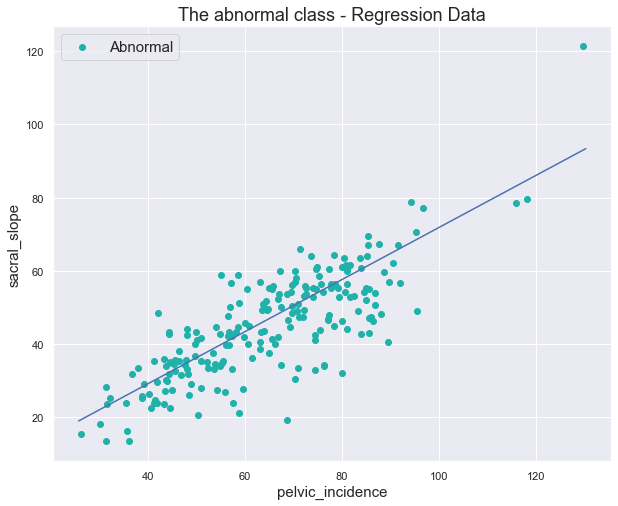

In [7]:
def linear_activation(z):
    return z

node = SingleNeuron(linear_activation)
node.train(X, y, alpha = 0.0001, epochs = 10)

domain = np.linspace(np.min(X) - .5, np.max(X) + .5, 100)
plt.figure(figsize = (10, 8))
plt.scatter(X, y, color = "lightseagreen", label = "Abnormal")
plt.plot(domain, node.predict(domain.reshape(-1, 1)))
plt.xlabel("pelvic_incidence", fontsize = 15)
plt.ylabel("sacral_slope", fontsize = 15)
plt.title("The abnormal class - Regression Data", fontsize = 18)
plt.legend(fontsize = 15)
plt.show()

The single regression line looks good to show the linear structure in the data. But maybe it could be better, if we set epochs larger. We will test this guess later.

Next, visualizing the mean square errors of each epoch of our training process.

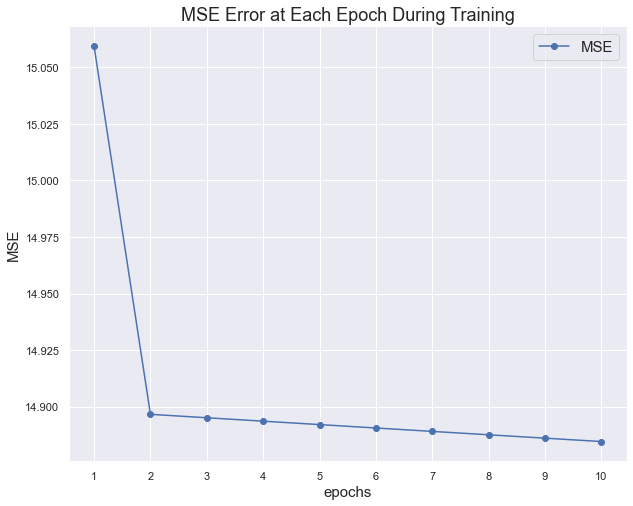

In [20]:
plt.figure(figsize = (10, 8))
plt.plot(range(1, len(node.errors_) + 1), 
         node.errors_,
         marker = "o",
         label = "MSE")
plt.xlabel("epochs", fontsize = 15)
plt.ylabel("MSE", fontsize = 15)
plt.xticks(range(1, len(node.errors_) + 1))
plt.legend(fontsize = 15)
plt.title("MSE Error at Each Epoch During Training", fontsize = 18)
plt.show()

From the plot, we can see after the second epoch, the MSE changes a little, which means the fit is not bad at the second epoch.

Now, testing the former guess with epochs=50.

Text(0.5, 1.0, 'MSE Error at Each Epoch During Training')

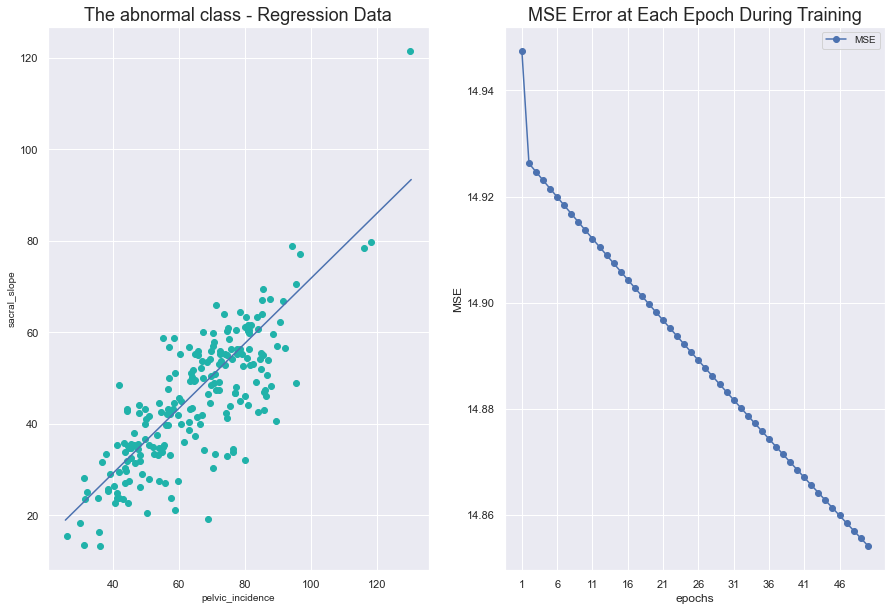

In [12]:
node = SingleNeuron(linear_activation)
node.train(X, y, alpha = .0001, epochs = 50)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,10))

ax1.scatter(X, y, color = "lightseagreen")
ax1.plot(domain, node.predict(domain.reshape(-1, 1)))
ax1.set_xlabel("pelvic_incidence", fontsize = 10)
ax1.set_ylabel("sacral_slope", fontsize = 10)
ax1.set_title("The abnormal class - Regression Data", fontsize = 18)

ax2.plot(range(1, len(node.errors_) + 1), 
         node.errors_,
         marker = "o",
         label = "MSE")
ax2.set_xlabel("epochs")
ax2.set_ylabel("MSE")
ax2.set_xticks(range(1, len(node.errors_) + 1, 5))
ax2.legend(fontsize = 10)
ax2.set_title("MSE Error at Each Epoch During Training", fontsize = 18)


The fit effect is better although the difference of "epochs=10" and "epochs=50" is small.

### Experiment with the learning rate

In the following, we will explore the fit models of different learning rates.

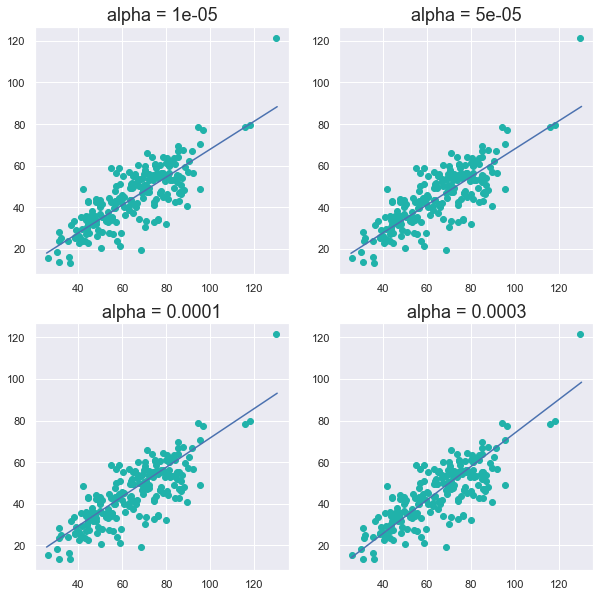

In [31]:
# Possible choices of learning rate 
alphas = [0.00001, 0.00005, 0.0001, 0.0003]

domain = np.linspace(np.min(X) - .5, np.max(X) + .5, 100)

# Call the subplots method for plotting a grid of figures
fig, axs = plt.subplots(2, 2, figsize=(10,10))

# Loop over the axs and alpha values
for ax, alpha in zip(axs.flat, alphas):
    node = SingleNeuron(linear_activation)
    node.train(X, y, alpha = alpha, epochs = 50)
    ax.plot(domain, node.predict(domain.reshape(-1, 1)))
    ax.scatter(X, y, color = "lightseagreen")
    ax.set_title(f"alpha = {alpha}", fontsize = 18)

The different values of $\alpha$ produce different fit, but it's not the smaller the value, the better the fit.